#### IMPORTS AND FUNCTIONS: 

In [1]:
import tensorflow as tf
import tensorflow 
from tensorflow import keras
from keras import layers, losses
from keras.layers import Dense
from tensorflow.keras.models import Model
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow.python.keras.models import Sequential,  load_model
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Reshape
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from tkinter import filedialog as fd
from scipy import signal
import datetime
import os
import datetime
import IPython
import IPython.display
from sklearn.preprocessing import MinMaxScaler
import datetime
import matplotlib.pyplot as plp
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy.fftpack import fft
from sklearn import preprocessing
from data.create_datasets import WindowGenerator
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from pyclustering.cluster import cluster_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Preprocessing

1. Enddate has been Indexed

In [3]:
def getFilePath():
    filename = fd.askopenfilename()
    return filename

Tbl = pd.read_csv( getFilePath(), sep= ',', encoding = 'utf-8', na_filter = False) #, index_col=None)#Tbl = Tbl.sort_values(by="enddate")
Tbl = Tbl.sort_values(by='enddate')
#Tbl = Tbl1.fillna(Tbl1)
Tbl.head()

,L1Name,enddate,signalname,timespan,updatedate,value
560493,DMG_TORNO,2022-06-06T04:54:24.500Z,ServoError_4_path1_DMG_TORNO,8.0,2022-06-06T04:54:16.500Z,0
560494,DMG_TORNO,2022-06-06T04:54:25.500Z,ServoError_4_path1_DMG_TORNO,1.0,2022-06-06T04:54:24.500Z,1
560495,DMG_TORNO,2022-06-06T04:55:13.500Z,ServoError_4_path1_DMG_TORNO,48.0,2022-06-06T04:54:25.500Z,0
560496,DMG_TORNO,2022-06-06T04:55:14.500Z,ServoError_4_path1_DMG_TORNO,1.0,2022-06-06T04:55:13.500Z,1
935689,DMG_TORNO,2022-06-06T04:55:16.500Z,SpindleTemp_0_path1_DMG_TORNO,60.0,2022-06-06T04:54:16.500Z,0


In [4]:
Tbl_index = pd.read_csv( getFilePath(), sep= ',', encoding = 'utf-8', na_filter = False,index_col='enddate') #, index_col=None)#Tbl = Tbl.sort_values(by="enddate")
#Tbl_index = Tbl.sort_values(by='enddate')
Tbl_index.head() 

,L1Name,signalname,timespan,updatedate,value
enddate,,,,,
2022-06-06T09:26:33.500Z,DMG_TORNO,ALARM,16337.0,2022-06-06T04:54:16.500Z,false
2022-06-06T09:26:42.500Z,DMG_TORNO,ALARM,9.0,2022-06-06T09:26:33.500Z,true
2022-06-06T14:32:12.000Z,DMG_TORNO,ALARM,18329.5,2022-06-06T09:26:42.500Z,false
2022-06-07T04:58:40.500Z,DMG_TORNO,ALARM,51988.5,2022-06-06T14:32:12.000Z,null
2022-06-07T10:05:32.500Z,DMG_TORNO,ALARM,18412.0,2022-06-07T04:58:40.500Z,false


In [5]:
col = Tbl_index['signalname'] 
col.info()

<class 'pandas.core.series.Series'>
Index: 936061 entries, 2022-06-06T09:26:33.500Z to 2022-06-14T04:57:52.500Z
Series name: signalname
Non-Null Count   Dtype 
--------------   ----- 
936061 non-null  object
dtypes: object(1)
memory usage: 14.3+ MB


In [6]:
## Converting datatype values to float
Tbl_index["value"] = pd.to_numeric(Tbl_index.value, errors='coerce')

Tbl_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936061 entries, 2022-06-06T09:26:33.500Z to 2022-06-14T04:57:52.500Z
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   L1Name      936061 non-null  object 
 1   signalname  936061 non-null  object 
 2   timespan    936061 non-null  float64
 3   updatedate  936061 non-null  object 
 4   value       914576 non-null  float64
dtypes: float64(2), object(3)
memory usage: 42.8+ MB


## 2. Converting to time-seconds index



In [7]:
Tbl_index.index = pd.to_datetime(Tbl_index.index)

Tbl_index

,L1Name,signalname,timespan,updatedate,value
enddate,,,,,
2022-06-06 09:26:33.500000+00:00,DMG_TORNO,ALARM,16337.0,2022-06-06T04:54:16.500Z,NaN
2022-06-06 09:26:42.500000+00:00,DMG_TORNO,ALARM,9.0,2022-06-06T09:26:33.500Z,NaN
2022-06-06 14:32:12+00:00,DMG_TORNO,ALARM,18329.5,2022-06-06T09:26:42.500Z,NaN
2022-06-07 04:58:40.500000+00:00,DMG_TORNO,ALARM,51988.5,2022-06-06T14:32:12.000Z,NaN
2022-06-07 10:05:32.500000+00:00,DMG_TORNO,ALARM,18412.0,2022-06-07T04:58:40.500Z,NaN
...,...,...,...,...,...
2022-06-09 04:59:04.500000+00:00,DMG_TORNO,WARNING,46057.5,2022-06-08T16:11:27.000Z,NaN
2022-06-09 16:16:23+00:00,DMG_TORNO,WARNING,40638.5,2022-06-09T04:59:04.500Z,NaN
2022-06-11 06:54:42.500000+00:00,DMG_TORNO,WARNING,139099.5,2022-06-09T16:16:23.000Z,NaN


# 3. Replacing the Nan Values amounts


In [8]:
#Drop unusefull Columns

#cols = ['L1Name', 'timespan', 'updatedate']
#Tbl1 = Tbl.drop(cols, axis=1)
#M=Tbl.isnull()

Current_x = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoCurrent_0_path1_DMG_TORNO']
Current_y = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoCurrent_1_path1_DMG_TORNO']
Current_s = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoCurrent_3_path1_DMG_TORNO']
ServoSpindleSpeed = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoSpeed_1_path1_DMG_TORNO']
ServoSpindleload = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoLoad_1_path1_DMG_TORNO']
Feedrate = Tbl_index['value'].loc[Tbl_index.signalname == 'ActF_path1_DMG_TORNO']
SpindelSpeed = Tbl_index['value'].loc[Tbl_index.signalname == 'ActS_path1_DMG_TORNO']
ServoError = Tbl_index['value'].loc[Tbl_index.signalname == 'ServoError_1_path1_DMG_TORNO']
PartsNum = Tbl_index['value'].loc[Tbl_index.signalname == 'PartsNum_path1_DMG_TORNO']
CutTime = Tbl_index['value'].loc[Tbl_index.signalname == 'CutTime_path1_DMG_TORNO']
RunTime = Tbl_index['value'].loc[Tbl_index.signalname == 'RunTime_path1_DMG_TORNO']
Abs_Position = Tbl_index['value'].loc[Tbl_index.signalname == 'AbsPos_1_path1_DMG_TORNO']



#Current.isna().sum()
#ServoSpindleSpeed.isna().sum()
RunTime.isnull().sum()



5

In [9]:
Run_Time = RunTime.fillna(method="ffill")
Cut_Time = CutTime.fillna(method="ffill")
Parts_Num = PartsNum.fillna(method="ffill")
Servo_Error = ServoError.fillna(method="ffill")
SpindelSpeed = SpindelSpeed.fillna(method="ffill")
Feedrate = Feedrate.fillna(method="ffill")
ServoSpindleload = ServoSpindleload.fillna(method="ffill")
SpindelSpeed = SpindelSpeed.fillna(method="ffill")
ServoSpindleSpeed = ServoSpindleSpeed.fillna(method="ffill")
Abs_Position = Abs_Position.fillna(method="ffill")
#Current = Current.fillna(method="ffill")

Current_x = Current_x.fillna(method="ffill")
Current_y = Current_y.fillna(method="ffill")
#Current_z = Current_z.fillna(method="ffill")
Current_s = Current_s.fillna(method="ffill")
Run_Time.isnull().sum()
#Run_Time

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


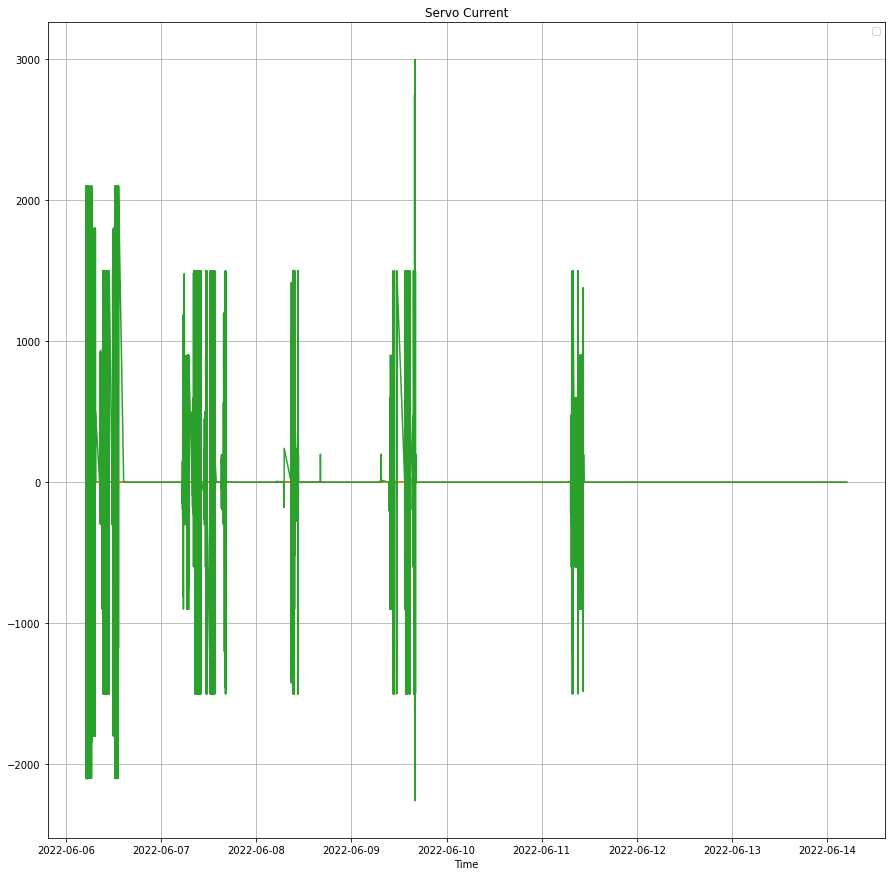

In [10]:
plt.subplots(1, 1, figsize=(15, 15))
plt.plot(Current_x)
plt.plot(Current_y)
plt.plot(ServoSpindleSpeed)
plt.legend()
plt.title("Servo Current")
plt.xlabel('Time')
plt.grid()

In [11]:
#Converting the series to dataframe
#Current_x = Current_x.to_frame()

#Spliting the data to train set and test set for validation purposes
train_x = Current_x['2022-06-06 04:58:21.500000+00:00':'2022-06-10 04:58:21.500000+00:00']
test_x = Current_x['2022-06-11 04:58:21.500000+00:00':'2022-06-11 09:58:21.500000+00:00']
validation_x = Current_x['2022-06-11 09:59:21.500000+00:00':'2022-06-11 10:00:00.500000+00:00']
validation_x.head

#xx = Current_x['value']

<bound method NDFrame.head of enddate
2022-06-11 09:59:21.500000+00:00    4.0
2022-06-11 09:59:23+00:00           3.0
2022-06-11 09:59:23.500000+00:00    2.0
2022-06-11 09:59:25+00:00           0.0
2022-06-11 09:59:25.500000+00:00    3.0
2022-06-11 09:59:44.500000+00:00    2.0
2022-06-11 09:59:45+00:00           6.0
2022-06-11 09:59:45.500000+00:00    4.0
Name: value, dtype: float64>

In [12]:
df_sample = pd.DataFrame(data=Current_x)

#df_sample


train_x.index = pd.to_datetime(train_x.index)

train_x

enddate
2022-06-06 04:58:22.500000+00:00    2.0
2022-06-06 04:58:23+00:00           1.0
2022-06-06 04:58:23.500000+00:00    0.0
2022-06-06 04:58:25+00:00           1.0
2022-06-06 04:58:25.500000+00:00    2.0
                                   ... 
2022-06-09 16:09:00.500000+00:00    2.0
2022-06-09 16:09:01+00:00           5.0
2022-06-09 16:09:09.500000+00:00    2.0
2022-06-09 16:15:49+00:00           3.0
2022-06-09 16:16:23+00:00           0.0
Name: value, Length: 14571, dtype: float64

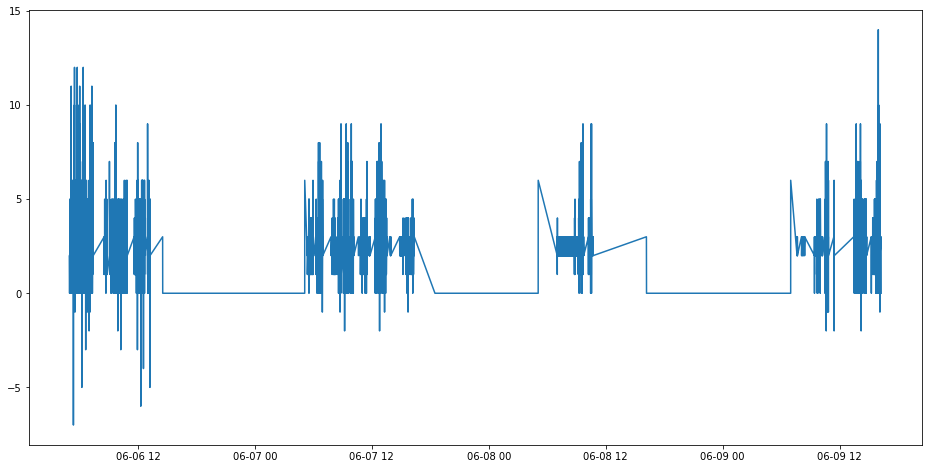

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import emd


# Quick summary figure
plt.figure(figsize=(16, 8))
plt.plot(train_x.index, train_x)


# sphinx_gallery_thumbnail_number = 6

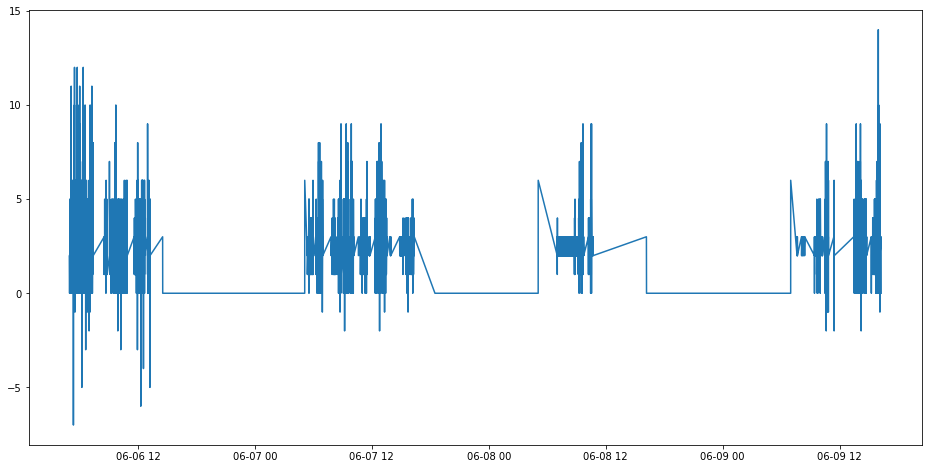

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import emd


# Quick summary figure
plt.figure(figsize=(16, 8))
plt.plot(train_x.index, train_x)


# sphinx_gallery_thumbnail_number = 6

In [15]:
# Applying FFT
fft_result = np.fft.fft(train_x )

# Generate sample signal data
signal = fft_result 

# Low-Pass Filter on the raw signal

In [16]:
import numpy as np
from scipy import signal

# Generate the signal data for demonstration
signal_data = fft_result  # Replace this with your own signal data

# Define the filter parameters
cutoff_frequency = 0.1  # Specify the cutoff frequency for the low-pass filter

# Design the low-pass filter
b, a = signal.butter(4, cutoff_frequency, 'low', analog=False, fs=1.0)

# Apply the filter to the signal
filtered_signal = signal.filtfilt(b, a, signal_data)


# Eliminating the first 50 points of the signal
filtered_signal = filtered_signal[50:]

In [17]:
# Assuming your dataset is stored in a variable called 'dataset'
#dataset = filtered_signal # Replace this with your actual dataset

# Set the limits for x and y dimensions
#x_limit = 800
#y_limit = 800

# Apply limits to the dataset
#limited_dataset = dataset[(dataset[:, 0] >= -x_limit) & (dataset[:, 0] <= x_limit) & 
                         # (dataset[:, 1] >= -y_limit) & (dataset[:, 1] <= y_limit)]

# Print the shape of the limited dataset
#print(limited_dataset.shape)

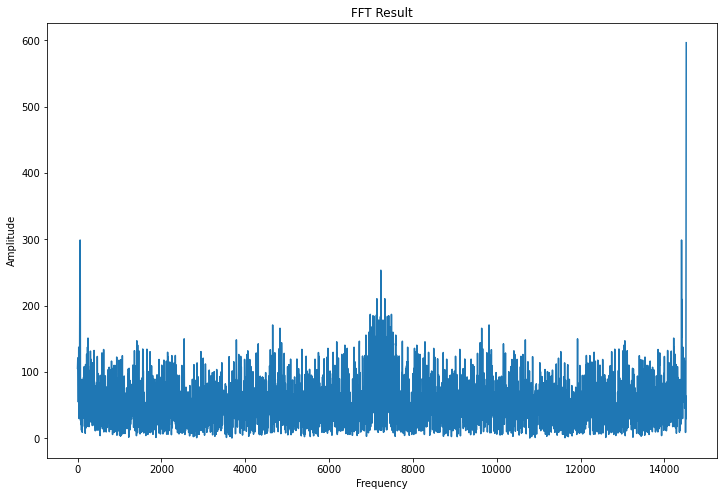

In [18]:
# Plotting the FFT result
plt.figure(figsize=(12, 8))
plt.plot(np.abs(filtered_signal))
plt.title('FFT Result')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Apply FFT and Standardization and DBSCAN

In [20]:
import tensorflow as tf
from tensorflow.keras import layers  # Correct import statement
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load and preprocess your segmented data
# segments = preprocess_segments(segments)
# Determine the range of segmentation lengths to test

segment_length = 10
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))

# Define the autoencoder architecture
input_dim = len(segments[0])  # The dimension of each segment
latent_dim = 2  # Choose an appropriate dimension for the latent space

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(10, activation='relu')(encoder_input)
encoder_output = layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = layers.Dense(10, activation='relu')(decoder_input)
decoder_output = layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the segmented data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Use the encoder to compress segments into a lower-dimensional representation
compressed_segments = encoder_model.predict(segments)



Epoch 1/10
46/46 [==============================] - 16s 13ms/step - loss: 2234.7800
Epoch 2/10
46/46 [==============================] - 0s 8ms/step - loss: 2015.4351
Epoch 3/10
46/46 [==============================] - 0s 10ms/step - loss: 1829.9630
Epoch 4/10
46/46 [==============================] - 1s 11ms/step - loss: 1567.9064
Epoch 5/10
46/46 [==============================] - 1s 13ms/step - loss: 1151.5989
Epoch 6/10
46/46 [==============================] - 0s 10ms/step - loss: 840.3727
Epoch 7/10
46/46 [==============================] - 0s 11ms/step - loss: 666.4329
Epoch 8/10
46/46 [==============================] - 1s 11ms/step - loss: 542.9765
Epoch 9/10
46/46 [==============================] - 1s 11ms/step - loss: 447.5995
Epoch 10/10
46/46 [==============================] - 1s 7ms/step


46/46 [==============================] - 1s 8ms/step


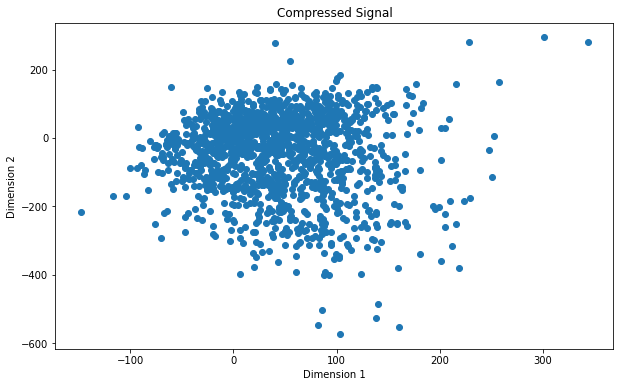

In [21]:
# Decode each augmented segment into two dimensions
decoded_augmented_segments = decoder_model.predict(compressed_segments)

# Plot the compressed signal
plt.figure(figsize=(10, 6))
plt.scatter(compressed_segments[:, 0], compressed_segments[:, 1])
#plt.scatter(decoded_augmented_segments[:, 0], decoded_augmented_segments[:, 1])
plt.title('Compressed Signal')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X = compressed_segments

# Standardize the data
X = StandardScaler().fit_transform(X)

# Apply density-based clustering (DBSCAN)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dense_heap_labels = dbscan.fit_predict(X)

# Visualize the dense heaps
plt.scatter(X[:, 0], X[:, 1], c=dense_heap_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Dense Heaps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Apply agglomerative clustering on dense heaps
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
final_labels = agglomerative.fit_predict(X[dense_heap_labels != -1])

# Visualize the final clustering result
plt.scatter(X[dense_heap_labels != -1, 0], X[dense_heap_labels != -1, 1], c=final_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Final Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


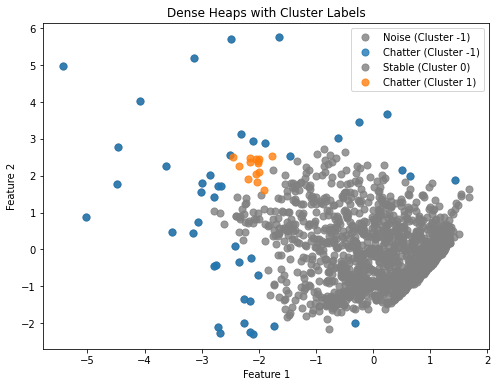

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X = compressed_segments

# Standardize the data
X = StandardScaler().fit_transform(X)

# Apply density-based clustering (DBSCAN)
dbscan = DBSCAN(eps=0.3, min_samples=5)
dense_heap_labels = dbscan.fit_predict(X)

# Visualize the dense heaps with labeled clusters
plt.figure(figsize=(8, 6))

# Label each cluster as "stable" or "chatter"
for label in np.unique(dense_heap_labels):
    if label == -1:
        # Noise points (chatter)
        plt.scatter(X[dense_heap_labels == label, 0], X[dense_heap_labels == label, 1],
                    label=f'Noise (Cluster {label})', c='gray', s=50, alpha=0.8)
    if label == 0:
        # Noise points (chatter)
        plt.scatter(X[dense_heap_labels == label, 0], X[dense_heap_labels == label, 1],
                    label=f'Stable (Cluster {label})', c='gray', s=50, alpha=0.8)
    else:
        # Stable clusters
        plt.scatter(X[dense_heap_labels == label, 0], X[dense_heap_labels == label, 1],
                    label=f'Chatter (Cluster {label})', s=50, alpha=0.8)

plt.title('Dense Heaps with Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


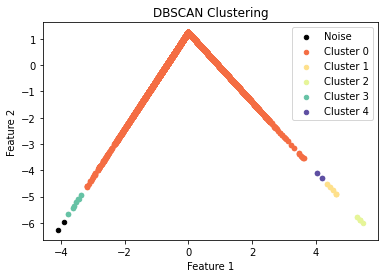

Best Number of Clusters: 5
Best eps: 0.3
Best min_samples: 3


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset
X = compressed_segments

# Standardize the dataset
X = StandardScaler().fit_transform(X)

# Apply DBSCAN clustering
def apply_dbscan(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# Plot the clusters
def plot_clusters(X, labels):
    unique_labels = np.unique(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for label, color in zip(unique_labels, colors):
        if label == -1:
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label='Noise', s=20, color='black')
        else:
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}', s=20, color=color)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('DBSCAN Clustering')
    plt.show()

# Example: Apply DBSCAN with different hyperparameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

best_eps = None
best_min_samples = None
best_num_clusters = 2

for eps in eps_values:
    for min_samples in min_samples_values:
        labels = apply_dbscan(X, eps=eps, min_samples=min_samples)
        num_clusters = len(np.unique(labels)) - 1  # Exclude noise label (-1)
        
        if num_clusters > best_num_clusters:
            best_num_clusters = num_clusters
            best_eps = eps
            best_min_samples = min_samples

# Apply DBSCAN with the best hyperparameters
best_labels = apply_dbscan(X, eps=best_eps, min_samples=best_min_samples)

# Plot the clusters with the best hyperparameters
plot_clusters(X, best_labels)

print(f"Best Number of Clusters: {best_num_clusters}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")


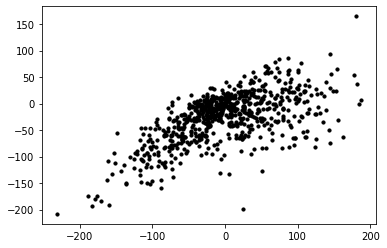

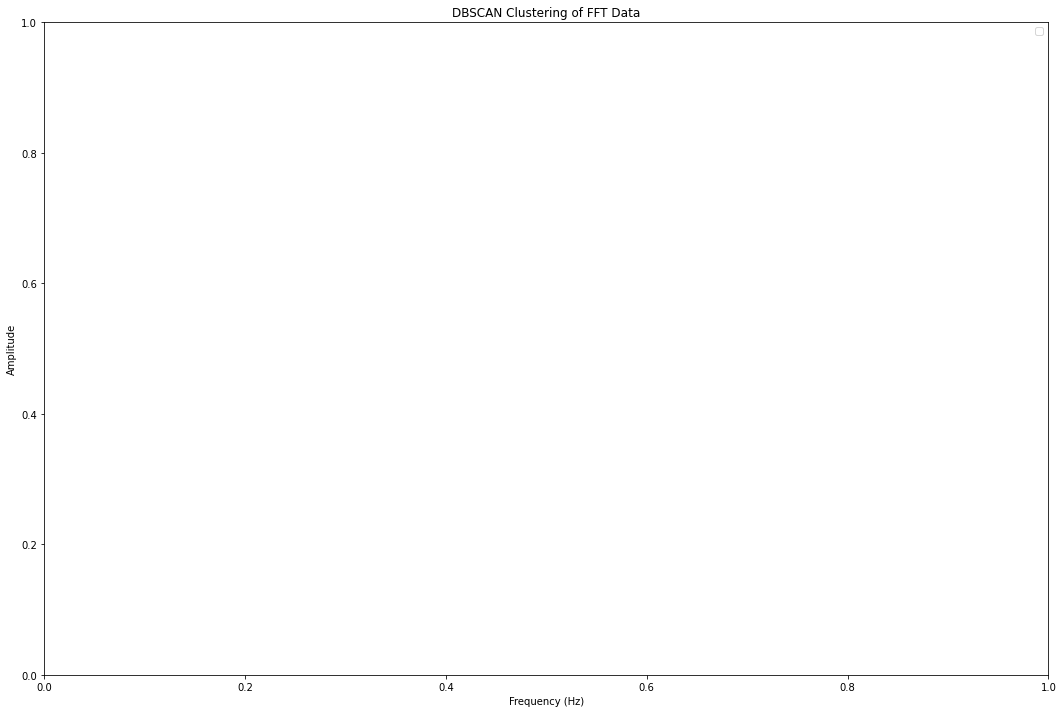

In [45]:
# Apply DBSCAN to cluster FFT data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(compressed_segments)

# Plot the clusters
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(compressed_segments[dbscan_labels == label, 1], compressed_segments[dbscan_labels == label, 0], label='Noise', s=10, color='black')
    else:
        plt.scatter(compressed_segments[dbscan_labels == label, 1], compressed_segments[dbscan_labels == label, 0], label=f'Cluster {label}')
plt.figure(figsize=(18, 12))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('DBSCAN Clustering of FFT Data')
plt.show()

In [42]:
# Define a list of different hyperparameters to try
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15]

best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Iterate through different hyperparameters and find the best accuracy
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(compressed_segments)

        # Check if there is more than one unique label
        unique_labels = np.unique(dbscan_labels)
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(compressed_segments, dbscan_labels)
        
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
# Apply DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(compressed_segments)



TypeError: eps must be an instance of float, not NoneType.

In [ ]:
# Plot the clusters with the best hyperparameters
plt.figure(figsize=(20, 10), dpi=100)
plt.grid(True, linestyle='--', alpha=0.5)

unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(compressed_segments[dbscan_labels == label, 0], compressed_segments[dbscan_labels == label, 1], label='Noise', s=20, color='black')
    if label == 0:
        plt.scatter(compressed_segments[dbscan_labels == label, 0], compressed_segments[dbscan_labels == label, 1], label='stable', s=20, color='red')
    if label == 1:
        plt.scatter(compressed_segments[dbscan_labels == label, 0], compressed_segments[dbscan_labels == label, 1], label='chatter', s=20)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('DBSCAN Clustering of FFT Data')
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

In [ ]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
#plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
plt.title('GMM-K_means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-31, -30)  # Set x-axis limits
plt.ylim(17, 18.5)  # Set y-axis limits
plt.show()

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess your segmented data
#segments = preprocess_segments(segments)
# Determine the range of segmentation lengths to test

segment_length = 20
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))

# Define the autoencoder architecture
input_dim = len(segments[0])  # The dimension of each segment
latent_dim = 2  # Choose an appropriate dimension for the latent space

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(10, activation='relu')(encoder_input)
encoder_output = layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = layers.Dense(10, activation='relu')(decoder_input)
decoder_output = layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the segmented data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Use the encoder to compress segments into a lower-dimensional representation
compressed_segments = encoder_model.predict(segments)
from sklearn.metrics import silhouette_score

# Define a list of different hyperparameters to try
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15]

best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Iterate through different hyperparameters and find the best accuracy
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(compressed_segments)
        silhouette_avg = silhouette_score(compressed_segments, dbscan_labels)
        
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Apply DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(compressed_segments)

# Plot the clusters with the best hyperparameters
plt.figure(figsize=(20, 10), dpi=100)
plt.grid(True, linestyle='--', alpha=0.5)

unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='Noise', s=20, color='black')
    if label == 0:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='stable', s=20, color='red')
    if label == 1:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='chatter', s=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('DBSCAN Clustering of FFT Data')
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

Epoch 1/10
23/23 [==============================] - 23s 57ms/step - loss: 2195.8403
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 2077.4058
Epoch 3/10
23/23 [==============================] - 0s 16ms/step - loss: 1985.3931
Epoch 4/10
23/23 [==============================] - 0s 18ms/step - loss: 1889.4292
Epoch 5/10
23/23 [==============================] - 0s 15ms/step - loss: 1786.7665
Epoch 6/10
23/23 [==============================] - 0s 17ms/step - loss: 1690.8898
Epoch 7/10
23/23 [==============================] - 0s 16ms/step - loss: 1605.8864
Epoch 8/10
23/23 [==============================] - 0s 20ms/step - loss: 1529.9932
Epoch 9/10
23/23 [==============================] - 0s 16ms/step - loss: 1463.7924
Epoch 10/10
23/23 [==============================] - 1s 12ms/step


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [27]:
# Apply DBSCAN to cluster FFT data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(compressed_segments)

# Plot the clusters
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(fft_freqs[dbscan_labels == label], fft_data[dbscan_labels == label, 0], label='Noise', s=10, color='black')
    else:
        plt.scatter(fft_freqs[dbscan_labels == label], fft_data[dbscan_labels == label, 0], label=f'Cluster {label}')
plt.figure(figsize=(18, 12))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('DBSCAN Clustering of FFT Data')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14521 but corresponding boolean dimension is 726

# Applying new segmentation approach(Segmentation of Current time series into subsequences using local minima)

In [21]:
import numpy as np

def calculate_threshold(data, window_size, factor):
    smoothed_data = np.convolve(data, np.ones(window_size)/window_size, mode='same')
    threshold = np.min(smoothed_data) * factor
    return threshold

def segment_time_series(data, threshold):
    segments = []
    start_idx = 0
    end_idx = 0
    n = len(data)

    for i in range(1, n-1):
        if data[i] < data[i-1] and data[i] < data[i+1] and data[i] < threshold:
            end_idx = i
            segment = data[start_idx:end_idx+1]
            segments.append(segment)
            start_idx = i

    # Add the last segment
    segments.append(data[start_idx:])

    return segments

# Example usage
time_series_data = filtered_signal
window_size = 5
factor = 0.8

threshold = calculate_threshold(time_series_data, window_size, factor)
segments = segment_time_series(time_series_data, threshold)

print("Threshold:", threshold)
for segment in segments:
    print(segment)

Threshold: (-176.68343107300052+48.778785148781395j)
[ -72.39352263 -76.7915469j   -78.13616173 -74.21195022j
  -77.71615126 -74.13120114j  -74.17733925 -77.15350478j
  -70.9603341  -83.07325143j  -70.42018427 -90.10141578j
  -73.13128912 -94.72707764j  -78.17597787 -92.72653868j
  -84.01892224 -81.0536164j   -89.32059832 -59.58542151j
  -93.23941918 -31.60632045j  -95.22927119  -2.60172947j
  -94.68377257 +22.05179467j  -90.78465447 +39.22733496j
  -82.68075758 +48.85358533j  -69.90488538 +53.08335483j
  -52.85188354 +54.56824312j  -33.12539204 +55.05964783j
  -13.53178583 +55.1160322j     2.4768453  +54.76258577j
   11.93277542 +54.34022558j   13.76927061 +54.88029548j
    9.89757148 +57.82117431j    5.15463577 +64.26488025j
    5.68296382 +74.12972646j   16.23036019 +85.56969163j
   37.74496999 +94.95378184j   66.66129329 +97.58280891j
   96.30299774 +89.15746221j  119.59784783 +67.68098979j
  131.66129373 +35.02880532j  131.07787545  -2.79073188j
  119.57469961 -37.25882188j  100.6

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Load and preprocess your segmented data
#segments = preprocess_segments(segments)

# Define the autoencoder architecture
input_dim = len(segments[0])  # The dimension of each segment
latent_dim = 2  # Choose an appropriate dimension for the latent space

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = layers.Dense(10, activation='relu')(encoder_input)
encoder_output = layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = layers.Dense(10, activation='relu')(decoder_input)
decoder_output = layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the segmented data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Use the encoder to compress segments into a lower-dimensional representation
compressed_segments = encoder_model.predict(segments)

Epoch 1/10
23/23 [==============================] - 11s 21ms/step - loss: 2293.7600
Epoch 2/10
23/23 [==============================] - 1s 30ms/step - loss: 2163.5049
Epoch 3/10
23/23 [==============================] - 1s 31ms/step - loss: 2071.7344
Epoch 4/10
23/23 [==============================] - 1s 21ms/step - loss: 1970.6970
Epoch 5/10
23/23 [==============================] - 1s 38ms/step - loss: 1855.4116
Epoch 6/10
23/23 [==============================] - 1s 26ms/step - loss: 1730.1246
Epoch 7/10
23/23 [==============================] - 0s 21ms/step - loss: 1611.2817
Epoch 8/10
23/23 [==============================] - 1s 24ms/step - loss: 1513.4808
Epoch 9/10
23/23 [==============================] - 0s 18ms/step - loss: 1424.5016
Epoch 10/10
23/23 [==============================] - 2s 13ms/step


In [35]:
from sklearn.metrics import silhouette_score

# Define a list of different hyperparameters to try
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15]

best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Iterate through different hyperparameters and find the best accuracy
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(compressed_segments)
        silhouette_avg = silhouette_score(compressed_segments, dbscan_labels)
        
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Apply DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(compressed_segments)

# Plot the clusters with the best hyperparameters
plt.figure(figsize=(20, 10), dpi=100)
plt.grid(True, linestyle='--', alpha=0.5)

unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='Noise', s=20, color='black')
    if label == 0:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='stable', s=20, color='red')
    if label == 1:
        plt.scatter(compressed_segments[dbscan_labels == label], compressed_segments[dbscan_labels == label, 0], label='chatter', s=20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('DBSCAN Clustering of FFT Data')
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
np.shape(segments)

input_dim = 6
latent_dim = 2

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)
    
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

       # Generate sample data
X = compressed_segments

    # GMM clustering
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)
gmm_cluster_centers = gmm.means_


    # Use GMM cluster centers as initial cluster centers for K-means
kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
kmeans.fit(X)
kmeans_labels = kmeans.labels_



    # Silhouette coefficient
    #silhouette_gmm = silhouette_score(X, gmm_labels)
silhouette_scores = silhouette_score(X, kmeans_labels)

In [ ]:
class DBSCANWithIterativeSearch:
    def __init__(self, RN, Nc):
        self.RN = RN
        self.Nc = Nc
        self.data = None
        self.labels = None

    def fit(self, data):
        self.data = data
        self.find_optimal_RN()
        self.find_optimal_Nc()
        self.cluster()

    def find_optimal_RN(self):
        k_dist_values = self.calculate_k_dist()
        # Your strategy to find the optimal RN goes here
        # For example, you can find a point where the K-dist curve slope increases significantly
        optimal_RN_index = np.argmax(np.diff(k_dist_values))
        self.RN = k_dist_values[optimal_RN_index]

    def find_optimal_Nc(self):
        density_peak_graph = self.calculate_density_peak_graph()
        # Your strategy to find the optimal Nc goes here
        # For example, you can identify high-density and low-density areas in the density peak graph
        high_density_points = np.where((density_peak_graph[:, 0] > self.Nc) & (density_peak_graph[:, 1] > self.Nc))[0]
        low_density_points = np.where((density_peak_graph[:, 0] < self.Nc) & (density_peak_graph[:, 1] > self.Nc))[0]
        if len(high_density_points) > len(low_density_points):
            self.Nc = density_peak_graph[high_density_points[0], 0]
        else:
            self.Nc = density_peak_graph[low_density_points[0], 0]

    def calculate_k_dist(self):
        nbrs = NearestNeighbors(n_neighbors=len(self.data), metric='euclidean').fit(self.data)
        distances, _ = nbrs.kneighbors(self.data)
        k_dist = np.sort(distances[:, -1])
        return k_dist

    def calculate_density_peak_graph(self):
        density_peak_graph = np.zeros((len(self.data), 2))
        for i, point in enumerate(self.data):
            distances = np.linalg.norm(self.data - point, axis=1)
            density_peak_graph[i, 0] = np.sum(distances < self.RN)
            nearest_high_density = np.argmin(distances[distances >= self.RN])
            density_peak_graph[i, 1] = distances[nearest_high_density]
        return density_peak_graph

    def cluster(self):
        # Implement DBSCAN clustering with the optimal hyperparameters RN and Nc
        # You can use the scikit-learn DBSCAN implementation or your custom implementation
        pass

if __name__ == "__main__":
    # Example usage
    data = filtered_signal  # Replace with your dataset
    RN_initial_guess = 0.1
    Nc_initial_guess = 5

    dbscan_iterative = DBSCANWithIterativeSearch(RN_initial_guess, Nc_initial_guess)
    dbscan_iterative.fit(data)
    print("Optimal RN:", dbscan_iterative.RN)
    print("Optimal Nc:", dbscan_iterative.Nc)

# Finding the optimal segment length

In [ ]:
data = filtered_signal

# Determine the range of segmentation lengths to test
min_segment_length = 1
max_segment_length = 20
segmentation_lengths = range(min_segment_length, max_segment_length + 1)

# List to store Silhouette scores for each segmentation length
silhouette_scores = []

# Perform clustering for each segmentation length
for segment_length in segmentation_lengths:
    # Sapply autoencoder for different segment lenght
    # Segment the signal into individual segments
    num_segments = filtered_signal.shape[0] // segment_length
    segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))
    # Define the autoencoder model
    input_dim = segment_length
    latent_dim = 2

    # Encoder
    encoder_input = tf.keras.Input(shape=(input_dim,))
    encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
    encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
    encoder_model = tf.keras.Model(encoder_input, encoder_output)

    # Decoder
    decoder_input = tf.keras.Input(shape=(latent_dim,))
    decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
    decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
    decoder_model = tf.keras.Model(decoder_input, decoder_output)

    # Autoencoder (combining encoder and decoder)
    autoencoder_input = tf.keras.Input(shape=(input_dim,))
    encoded = encoder_model(autoencoder_input)
    decoded = decoder_model(encoded)
    autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

    # Compile the model
    autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


    # Train the autoencoder on the segmented signal data
    autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

    # Compress each segment into two dimensions
    compressed_segments = encoder_model.predict(segments)
    

       # Generate sample data
    X = compressed_segments

    # GMM clustering
    gmm = GaussianMixture(n_components=2)
    gmm_labels = gmm.fit_predict(X)
    gmm_cluster_centers = gmm.means_


    # Use GMM cluster centers as initial cluster centers for K-means
    kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_



    # Silhouette coefficient
    #silhouette_gmm = silhouette_score(X, gmm_labels)
    silhouette_scores = silhouette_score(X, kmeans_labels)

# Find the segmentation length with the highest Silhouette score
optimal_segment_length = segmentation_lengths[np.argmax(silhouette_scores)]

print(f"Optimal Segmentation Length: {optimal_segment_length}")

# Define Autoencoder Model applying Only FFT on raw signal with segment length 1(optimum length according the above)

In [ ]:
#segment_length = 10
#num_segments = filtered_signal.shape[0] // segment_length
#segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))
# Define the autoencoder model
input_dim = 6
latent_dim = 2


# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=100, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)

In [ ]:
# Eliminating the first 50 points of the signal
fft_result = fft_result[50:]
# Plotting the FFT result
plt.figure(figsize=(12, 8))
plt.plot(np.abs(fft_result))
plt.title('FFT Result')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Decode each augmented segment into two dimensions
decoded_augmented_segments = decoder_model.predict(compressed_segments)

# Plot the compressed signal
plt.figure(figsize=(10, 6))
plt.scatter(compressed_segments[:, 0], compressed_segments[:, 1])
#plt.scatter(decoded_augmented_segments[:, 0], decoded_augmented_segments[:, 1])
plt.title('Compressed Signal')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
# Calculating average, var, std of Original Signal
print(np.average(train_x))

# Calculating variance using var()
print(np.var(filtered_signal))

# Calculating standard
# deviation using var()
print(np.std(filtered_signal))

In [ ]:
# Calculating average, var, std of Original Signal
print(np.average(decoded_augmented_segments))

# Calculating variance using var()
print(np.var(decoded_augmented_segments))

# Calculating standard
# deviation using var()
print(np.std(decoded_augmented_segments))

In [ ]:
#Plot the original signal and decoded signal
# Compress each augmented segment into two dimensions
compressed_augmented_segments = encoder_model.predict(filtered_signal)
# Decode each augmented segment into two dimensions
decoded_augmented_segments = decoder_model.predict(compressed_augmented_segments)
# Plot the compressed signal
plt.figure(figsize=(10, 6), dpi=100)  # Increase the figure size and resolution
plt.plot(np.abs(filtered_signal), marker='o', markersize=4, label='FFT_Filtred Signal', linestyle='-', linewidth=0.5)
plt.plot(np.abs(decoded_augmented_segments), marker='*', markersize=4, label='Decoded_Signal', linestyle='-', linewidth=0.5)
plt.title(f'FFT_Filtred Signal-one week (Current)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
# Adjust the x-axis range to exclude the beginning of the charts
#start_index = 100  # Specify the index from where you want to start plotting
#plt.xlim(start_index, len(augmented_signal))
#plt.ylim(-5, 300)
plt.legend()  # Add legend based on labels specified in the plot function
plt.show()


In [ ]:
# Define the data augmentation techniques
augmentation_techniques = {
    'Normalization': lambda x: (x - np.mean(x)) / np.std(x),
    'Standardization': lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),
    'Range Scaling': lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))
}
# Plot the compressed signal for each data augmentation technique
for technique_name, augmentation_func in augmentation_techniques.items():
    augmented_signal = augmentation_func(filtered_signal)

    # Segment the augmented signal into individual segments
    #augmented_segments = np.reshape(augmented_signal[:num_segments * segment_length], (num_segments, segment_length))

    # Compress each augmented segment into two dimensions
    compressed_augmented_segments = encoder_model.predict(augmented_signal)
     # Decode each augmented segment into two dimensions
    decoded_augmented_segments = decoder_model.predict(compressed_augmented_segments)
    # Plot the compressed signal
    plt.figure(figsize=(10, 6), dpi=100)  # Increase the figure size and resolution
    plt.plot(np.abs(augmented_signal), marker='o', markersize=4, label='Scaled Signal', linestyle='-', linewidth=1)
    plt.plot(np.abs(decoded_augmented_segments), marker='*', markersize=4, label='Decoded Normalized Signal', linestyle='-', linewidth=1)

    plt.title(f'FFT of Signal - {technique_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

    # Adjust the x-axis range to exclude the beginning of the charts
    start_index = 100  # Specify the index from where you want to start plotting
    plt.xlim(start_index, len(augmented_signal))
    #plt.ylim(-0.02, 0.75)

    plt.legend()  # Add legend based on labels specified in the plot function

    plt.show()

# Applying Clustering method for chatter detection

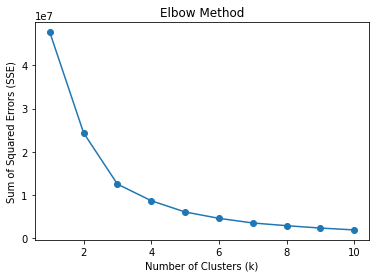

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data for demonstration

X = compressed_segments

# Initialize an empty list to store SSE values for different k values
sse = []

# Try different values of k and calculate SSE
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE value

# Plotting the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# Evaluating the GMM and K-means Clustering Model

In [56]:
# Generate sample data
X = compressed_segments

# GMM clustering
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)
gmm_cluster_centers = gmm.means_


# Use GMM cluster centers as initial cluster centers for K-means
kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
kmeans.fit(X)
kmeans_labels = kmeans.labels_



# Silhouette coefficient
silhouette_gmm = silhouette_score(X, gmm_labels)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calinski-Harabasz index
ch_gmm = calinski_harabasz_score(X, gmm_labels)
ch_kmeans = calinski_harabasz_score(X, kmeans_labels)

# Davies-Bouldin index
#db_gmm = davies_bouldin_score(X, gmm_labels)
#db_kmeans = davies_bouldin_score(X, kmeans_labels)

# Krzanowski and Lai index
#kl_gmm = davies_bouldin_index(X, gmm_labels)
#kl_kmeans = davies_bouldin_index(X, kmeans_labels)

# S_Dbw index
#sd_bw_gmm = sd_bw(X, gmm_labels)
#sd_bw_kmeans = sd_bw(X, kmeans_labels)

# Dunn Validity index
#dvi_gmm = dunn(X, gmm_labels)
#dvi_kmeans = dunn(X, kmeans_labels)

# Print the evaluation results
print("GMM clustering:")
print("Silhouette coefficient:", silhouette_gmm)
print("Calinski-Harabasz index:", ch_gmm)
#print("Davies-Bouldin index:", db_gmm)
#print("Krzanowski and Lai index:", kl_gmm)
#print("S_Dbw index:", sd_bw_gmm)
#print("Dunn Validity index:", dvi_gmm)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



GMM clustering:
Silhouette coefficient: 0.4451546
Calinski-Harabasz index: 11952.076544326463


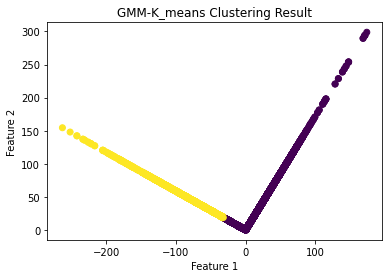

In [65]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
#plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
plt.title('GMM-K_means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

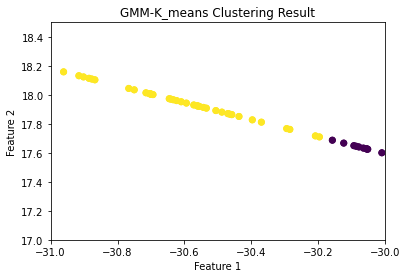

In [64]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
#plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
plt.title('GMM-K_means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-31, -30)  # Set x-axis limits
plt.ylim(17, 18.5)  # Set y-axis limits
plt.show()

# Save the model for applying on different datasets

In [ ]:
import pickle
from sklearn.cluster import KMeans

# Save the trained model to a file
model_filename = 'GMM_kmeans_model_filtered.pkl'

In [ ]:
# Specify the file path to the saved pickle model
model_path = 'GMM_kmeans_model_filtered.pkl'

# Open the pickle model file using the 'rb' mode for reading
with open(model_path, 'rb') as file:
    # Load the pickle model object
    loaded_model = pickle.load(file)

# Now you can use the loaded model for inference or any other tasks
# For example, let's say our loaded model is a classifier and we want to make a prediction

prediction = loaded_model.predict(compressed_segments)

print("Prediction:", prediction)

# Applying different data augumentation on FFT-filtered_segmenten1_signal and plot the clustering results 

Epoch 1/10
454/454 [==============================] - 2s 2ms/step - loss: 0.2319
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0690
Epoch 3/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0351
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0204
Epoch 5/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0130
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 7/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 8/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 9/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0035
Epoch 10/10
454/454 [==============================] - 1s 2ms/step


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



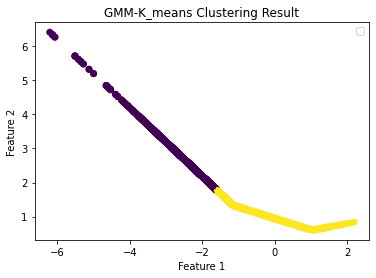

Epoch 1/10
454/454 [==============================] - 2s 2ms/step - loss: 0.2151
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 3/10
454/454 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 3.1662e-04
Epoch 5/10
454/454 [==============================] - 1s 2ms/step - loss: 1.7606e-05
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 1.7075e-06
Epoch 7/10
454/454 [==============================] - 1s 2ms/step - loss: 1.5645e-06
Epoch 8/10
454/454 [==============================] - 1s 2ms/step - loss: 1.5185e-06
Epoch 9/10
454/454 [==============================] - 1s 2ms/step - loss: 1.5281e-06
Epoch 10/10
454/454 [==============================] - 1s 2ms/step


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



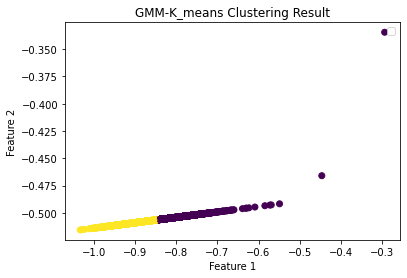

Epoch 1/10
454/454 [==============================] - 2s 2ms/step - loss: 3.6631e-04
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 3.4040e-05
Epoch 3/10
454/454 [==============================] - 1s 3ms/step - loss: 1.6570e-05
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 8.7664e-06
Epoch 5/10
454/454 [==============================] - 1s 2ms/step - loss: 5.6139e-06
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 3.0809e-06
Epoch 7/10
454/454 [==============================] - 1s 3ms/step - loss: 2.2027e-06
Epoch 8/10
454/454 [==============================] - 1s 3ms/step - loss: 1.1411e-06
Epoch 9/10
454/454 [==============================] - 1s 2ms/step - loss: 5.6114e-07
Epoch 10/10
454/454 [==============================] - 1s 2ms/step


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



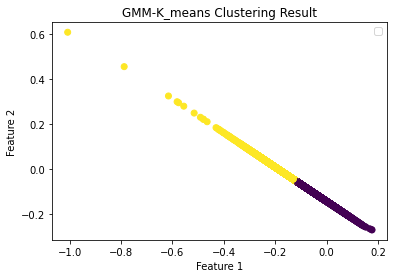

In [37]:
data = filtered_signal

# Determine the range of segmentation lengths to test
segment_length = 1
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))



# Define the data augmentation techniques
augmentation_techniques = {
    'Normalization': lambda x: (x - np.mean(x)) / np.std(x),
    'Standardization': lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),
    'Range Scaling': lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))
}
# Plot the compressed signal for each data augmentation technique
for technique_name, augmentation_func in augmentation_techniques.items():
    augmented_signal = augmentation_func(segments)
    
    input_dim = segment_length
    latent_dim = 2

    # Encoder
    encoder_input = tf.keras.Input(shape=(input_dim,))
    encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
    encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
    encoder_model = tf.keras.Model(encoder_input, encoder_output)

    # Decoder
    decoder_input = tf.keras.Input(shape=(latent_dim,))
    decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
    decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
    decoder_model = tf.keras.Model(decoder_input, decoder_output)

    # Autoencoder (combining encoder and decoder)
    autoencoder_input = tf.keras.Input(shape=(input_dim,))
    encoded = encoder_model(autoencoder_input)
    decoded = decoder_model(encoded)
    autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

    # Compile the model
    autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


    # Train the autoencoder on the segmented signal data
    autoencoder_model.fit(augmented_signal, augmented_signal, epochs=10, batch_size=32)

    # Compress each segment into two dimensions
    compressed_segments = encoder_model.predict(augmented_signal)
    

       # Generate sample data
    X = compressed_segments

    # GMM clustering
    gmm = GaussianMixture(n_components=2)
    gmm_labels = gmm.fit_predict(X)
    gmm_cluster_centers = gmm.means_


    # Use GMM cluster centers as initial cluster centers for K-means
    kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_

    # Compress each augmented segment into two dimensions
    #compressed_augmented_segments = encoder_model.predict(augmented_signal)
     # Decode each augmented segment into two dimensions
    #decoded_augmented_segments = decoder_model.predict(compressed_augmented_segments)
    # Plot the compressed signal
    # Scatter plot of the clustering result
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
    #plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
    plt.title('GMM-K_means Clustering Result')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()  # Add legend based on labels specified in the plot function
    plt.show()

# Define Autoencoder Model applying Only FFT on raw signal with segment length 1- decoded to 3 dimensions

In [38]:
# Define the autoencoder model

# Segment the signal into individual segments
segment_length = 1
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))

input_dim = 1
latent_dim = 3

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=100, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)

Epoch 1/100
454/454 [==============================] - 4s 3ms/step - loss: 267.8009
Epoch 2/100
454/454 [==============================] - 1s 2ms/step - loss: 0.1110
Epoch 3/100
454/454 [==============================] - 1s 2ms/step - loss: 0.0739
Epoch 4/100
454/454 [==============================] - 1s 2ms/step - loss: 0.0416
Epoch 5/100
454/454 [==============================] - 1s 2ms/step - loss: 0.0193
Epoch 6/100
454/454 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 7/100
454/454 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 8/100
454/454 [==============================] - 1s 2ms/step - loss: 3.8495e-04
Epoch 9/100
454/454 [==============================] - 1s 2ms/step - loss: 5.5193e-05
Epoch 10/100
454/454 [==============================] - 1s 2ms/step - loss: 1.1259e-05
Epoch 11/100
454/454 [==============================] - 1s 2ms/step - loss: 7.6495e-06
Epoch 12/100
454/454 [==============================] - 1s 2ms/step - loss: 7.

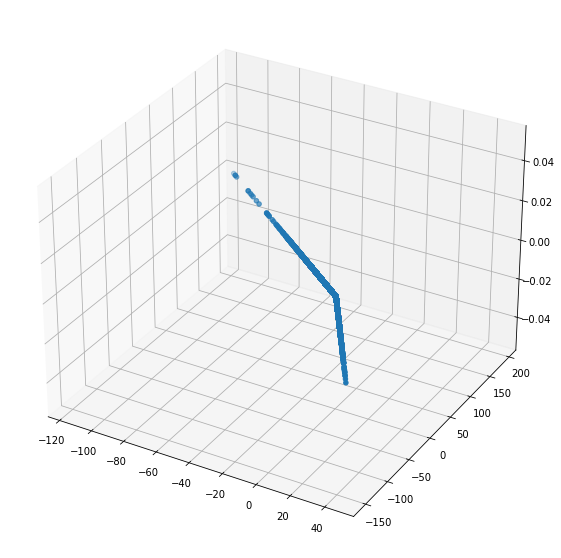

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
#colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black',5:'orange', 6:'cyan', 7:'yellow', 8:'brown'}
ax.scatter(compressed_segments[:, 0],compressed_segments[:, 1])
#ax.scatter(list(df_IF.CompAmps.values),list(df_IF.Discharge_Temp.values), c=df_IF['ClusterLabels'].apply(lambda x: colors[x]))
plt.show()

# Applying Clustering method for chatter detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data for demonstration

X = compressed_segments

# Initialize an empty list to store SSE values for different k values
sse = []

# Try different values of k and calculate SSE
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE value

# Plotting the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# Evaluating the GMM and K-means Clustering Model

In [ ]:
# Generate sample data
X = compressed_segments

# GMM clustering
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)
gmm_cluster_centers = gmm.means_


# Use GMM cluster centers as initial cluster centers for K-means
kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
kmeans.fit(X)
kmeans_labels = kmeans.labels_



# Silhouette coefficient
silhouette_gmm = silhouette_score(X, gmm_labels)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calinski-Harabasz index
ch_gmm = calinski_harabasz_score(X, gmm_labels)
ch_kmeans = calinski_harabasz_score(X, kmeans_labels)

# Davies-Bouldin index
#db_gmm = davies_bouldin_score(X, gmm_labels)
#db_kmeans = davies_bouldin_score(X, kmeans_labels)

# Krzanowski and Lai index
#kl_gmm = davies_bouldin_index(X, gmm_labels)
#kl_kmeans = davies_bouldin_index(X, kmeans_labels)

# S_Dbw index
#sd_bw_gmm = sd_bw(X, gmm_labels)
#sd_bw_kmeans = sd_bw(X, kmeans_labels)

# Dunn Validity index
#dvi_gmm = dunn(X, gmm_labels)
#dvi_kmeans = dunn(X, kmeans_labels)

# Print the evaluation results
print("GMM clustering:")
print("Silhouette coefficient:", silhouette_gmm)
print("Calinski-Harabasz index:", ch_gmm)
#print("Davies-Bouldin index:", db_gmm)
#print("Krzanowski and Lai index:", kl_gmm)
#print("S_Dbw index:", sd_bw_gmm)
#print("Dunn Validity index:", dvi_gmm)

In [ ]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
#plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
plt.title('GMM-K_means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Define Autoencoder Model applying Only FFT on raw signal with segment length 20

In [ ]:
# Define the autoencoder model

# Segment the signal into individual segments
segment_length = 500
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))

input_dim = 500
latent_dim = 2

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=100, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)

In [ ]:
# Decode each augmented segment into two dimensions
decoded_augmented_segments = decoder_model.predict(compressed_segments)

plt.figure(figsize=(10, 6))
plt.scatter(compressed_segments[:, 0], compressed_segments[:, 1])
#plt.scatter(decoded_augmented_segments[:, 0], decoded_augmented_segments[:, 1])
plt.title('Compressed Signal')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Set the limits for x and y axes
#plt.xlim(-600, 600)
#plt.ylim(-600, 600)

plt.show()

# Applying Clustering method for chatter detection

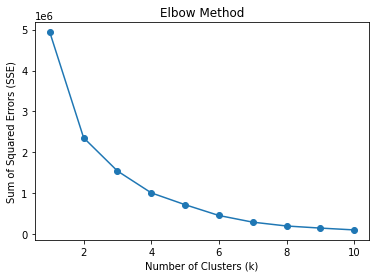

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data for demonstration

X = compressed_segments

# Initialize an empty list to store SSE values for different k values
sse = []

# Try different values of k and calculate SSE
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the SSE value

# Plotting the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# Evaluating the GMM and K-means Clustering Model

In [36]:
# Generate sample data
X = compressed_segments

# GMM clustering
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)
gmm_cluster_centers = gmm.means_


# Use GMM cluster centers as initial cluster centers for K-means
kmeans = KMeans(n_clusters=2, init=gmm_cluster_centers)
kmeans.fit(X)
kmeans_labels = kmeans.labels_



# Silhouette coefficient
silhouette_gmm = silhouette_score(X, gmm_labels)
silhouette_kmeans = silhouette_score(X, kmeans_labels)

# Calinski-Harabasz index
ch_gmm = calinski_harabasz_score(X, gmm_labels)
ch_kmeans = calinski_harabasz_score(X, kmeans_labels)

# Davies-Bouldin index
#db_gmm = davies_bouldin_score(X, gmm_labels)
#db_kmeans = davies_bouldin_score(X, kmeans_labels)

# Krzanowski and Lai index
#kl_gmm = davies_bouldin_index(X, gmm_labels)
#kl_kmeans = davies_bouldin_index(X, kmeans_labels)

# S_Dbw index
#sd_bw_gmm = sd_bw(X, gmm_labels)
#sd_bw_kmeans = sd_bw(X, kmeans_labels)

# Dunn Validity index
#dvi_gmm = dunn(X, gmm_labels)
#dvi_kmeans = dunn(X, kmeans_labels)

# Print the evaluation results
print("GMM clustering:")
print("Silhouette coefficient:", silhouette_gmm)
print("Calinski-Harabasz index:", ch_gmm)
#print("Davies-Bouldin index:", db_gmm)
#print("Krzanowski and Lai index:", kl_gmm)
#print("S_Dbw index:", sd_bw_gmm)
#print("Dunn Validity index:", dvi_gmm)

GMM clustering:
Silhouette coefficient: 0.707694
Calinski-Harabasz index: 28.05895163588686


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning:

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.



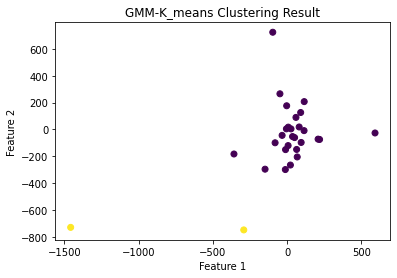

In [37]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
#plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], marker='X', color='red')
plt.title('GMM-K_means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [47]:
# Assuming your dataset is stored in a variable called 'dataset'
#dataset = compressed_segments  # Replace this with your actual dataset

# Set the limits for x and y dimensions
#x_limit = 800
#y_limit = 800

# Apply limits to the dataset
#limited_dataset = dataset[(dataset[:, 0] >= -x_limit) & (dataset[:, 0] <= x_limit) & 
 #                         (dataset[:, 1] >= -y_limit) & (dataset[:, 1] <= y_limit)]

# Print the shape of the limited dataset
#print(limited_dataset.shape)

In [31]:
# Calculating average, var, std of Original Signal
print(np.average(train_x))

# Calculating variance using var()
print(np.var(filtered_signal))

# Calculating standard
# deviation using var()
print(np.std(filtered_signal))

2.3450003431473476
4353.581160533193
65.98167291402358


In [32]:
# Calculating average, var, std of Original Signal
print(np.average(decoded_augmented_segments))

# Calculating variance using var()
print(np.var(decoded_augmented_segments))

# Calculating standard
# deviation using var()
print(np.std(decoded_augmented_segments))

-0.2944984
369.6711
19.226833


# Applying AE with segmentation 50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample time series signal
num_samples = 1000
time = np.linspace(0, 10, num_samples)
amplitude = np.sin(2 * np.pi * 5 * time) + np.sin(2 * np.pi * 10 * time)
signal = amplitude

# Compute the FFT of the time series signal
fft_signal = np.fft.fftshift(np.fft.fft(signal))

# Calculate the number of rows and columns for the image
image_rows = int(np.sqrt(num_samples))
image_cols = num_samples // image_rows

# Reshape the FFT signal into a 2D image
fft_image = np.abs(fft_signal).reshape(image_rows, image_cols)

# Plot the original time series signal
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(time, signal)
plt.title('Original Time Series Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the FFT image
plt.subplot(1, 2, 2)
plt.imshow(fft_image, cmap='hot', extent=[-np.pi, np.pi, -np.pi, np.pi])
plt.title('FFT Image')
plt.xlabel('Frequency (radians)')
plt.ylabel('Frequency (radians)')
plt.colorbar()

plt.tight_layout()
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data (replace this with your real data loading process)
# Assuming you have a list of FFT images and corresponding labels
# X_train, X_test, y_train, y_test = load_data()

# Example synthetic data (replace this with your real data loading process)
num_samples = 1000
image_height, image_width = 224, 224
num_classes = 2

X_train = np.random.rand(num_samples, image_height, image_width, 3)  # Replace with actual data
y_train = np.random.randint(2, size=num_samples)  # Replace with actual labels

# Preprocess images based on the chosen pre-trained model
def preprocess_input(model_name, x):
    if model_name == 'VGG16':
        return vgg16_preprocess_input(x)
    elif model_name == 'ResNet50':
        return resnet50_preprocess_input(x)
    else:
        raise ValueError("Unsupported model")

# Load pre-trained models
base_model_vgg16 = VGG16(weights='imagenet', include_top=False)
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False)

# Define model architecture
def build_model(base_model, model_name):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, model_name

# Choose which pre-trained model to use
chosen_model_name = 'VGG16'
if chosen_model_name == 'VGG16':
    base_model = base_model_vgg16
elif chosen_model_name == 'ResNet50':
    base_model = base_model_resnet50
else:
    raise ValueError("Unsupported model")

# Build the model
model, model_name = build_model(base_model, chosen_model_name)

# Train the model
model.fit(
    preprocess_input(model_name, X_train),
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model on test data (replace this with your real evaluation process)
# X_test_preprocessed = preprocess_input(model_name, X_test)
# y_pred = model.predict(X_test_preprocessed)
# accuracy = accuracy_score(y_test, y_pred.round())
# print(f"Test Accuracy: {accuracy}")


94765736/94765736 [==============================] - 13s 0us/step
Epoch 1/5


ValueError: in user code:

    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((32, 2) vs (32, 1)).


In [135]:
# Define the autoencoder model

# Segment the signal into individual segments
segment_length = 50
num_segments = filtered_signal.shape[0] // segment_length
segments = np.reshape(filtered_signal[:num_segments * segment_length], (num_segments, segment_length))

input_dim = 50
latent_dim = 2

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=100, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)

Epoch 1/100
10/10 [==============================] - 1s 7ms/step - loss: 2402.8921
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 2328.1501
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 2279.4697
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2244.7952
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 2219.0996
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2196.4336
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2175.1072
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 2155.8489
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2132.9790
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 2108.0715
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 2079.9827
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 2054.0801
E

10/10 [==============================] - 0s 2ms/step


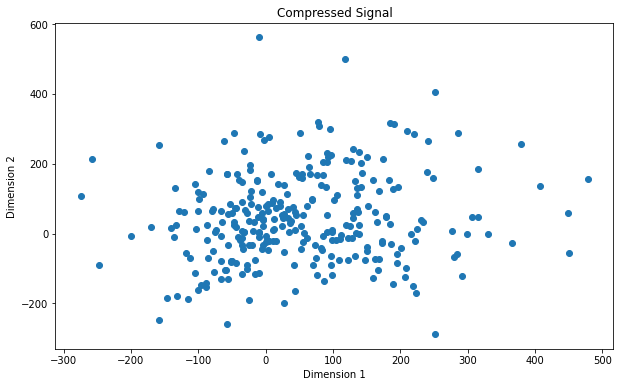

In [136]:
# Decode each augmented segment into two dimensions
decoded_augmented_segments = decoder_model.predict(compressed_segments)

plt.figure(figsize=(10, 6))
plt.scatter(compressed_segments[:, 0], compressed_segments[:, 1])
#plt.scatter(decoded_augmented_segments[:, 0], decoded_augmented_segments[:, 1])
plt.title('Compressed Signal')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Set the limits for x and y axes
#plt.xlim(-600, 600)
#plt.ylim(-600, 600)

plt.show()

# Applying Normalization, Standardization, Range scaling on dataset

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Applying FFT
fft_result = np.fft.fft(train_x )

# Generate sample signal data
signal = fft_result  # Replace with your own signal data

# Segment the signal into individual segments
segment_length = 50  # Length of each segment
num_segments = signal.shape[0] // segment_length  # Number of segments
segments = np.reshape(signal[:num_segments * segment_length], (num_segments, segment_length))



# Define the data augmentation techniques
augmentation_techniques = {
    'Normalization': lambda x: (x - np.mean(x)) / np.std(x),
    'Standardization': lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),
    'Range Scaling': lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))
}

# Define the autoencoder model
input_dim = segment_length  # Update the input dimension
latent_dim = 2

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')



# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)


Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 104364.1406
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 101900.7969
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 99777.9531
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 98482.2500
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 96876.5781
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 95215.8438
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 94798.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 93433.0781
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 92725.2812
Epoch 10/10
10/10 [==============================] - 0s 2ms/step


In [42]:
# Plot the compressed signal for each data augmentation technique
for technique_name, augmentation_func in augmentation_techniques.items():
    augmented_signal = augmentation_func(signal)

    # Segment the augmented signal into individual segments
    augmented_segments = np.reshape(augmented_signal[:num_segments * segment_length], (num_segments, segment_length))

    # Compress each augmented segment into two dimensions
    compressed_augmented_segments = encoder_model.predict(augmented_segments)
     # Decode each augmented segment into two dimensions
    decoded_augmented_segments = decoder_model.predict(compressed_augmented_segments)
    # Fit K-means clustering
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_

    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X)
    gmm_labels = gmm.predict(X)

        # Calculate precision, recall, and F1-score
    kmeans_precision = precision_score(kmeans_labels, gmm_labels)
    kmeans_recall = recall_score(kmeans_labels, gmm_labels)
    kmeans_f1_score = f1_score(kmeans_labels, gmm_labels)

    print("Precision:", kmeans_precision)
    print("Recall:", kmeans_recall)
    print("F1-score:", kmeans_f1_score)


    # Plot the compressed signal
    plt.figure()
    #plt.scatter(compressed_augmented_segments[:, 0], compressed_augmented_segments[:, 1])
    plt.scatter(compressed_augmented_segments[:, 0], compressed_augmented_segments[:, 1], c=kmeans_labels, cmap='viridis')
    #plt.scatter(kmeans_labels[:, 0], kmeans_labels[:, 1], c = 'r')
    #plt.scatter(gmm_labels[:, 0], gmm_labels[:, 1], c = 'b')
    plt.title(f'Compressed Signal - {technique_name}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

10/10 [==============================] - 0s 2ms/step


NameError: name 'f1_score' is not defined

# Apply AE for different segmentation lenght

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate sample signal data
signal = fft_result  # Replace with your own signal data

# Define the data augmentation techniques
augmentation_techniques = {
    'Normalization': lambda x: (x - np.mean(x)) / np.std(x),
    'Standardization': lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)),
    'Range Scaling': lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))
}

# Define the autoencoder model
input_dim = 1  # Update the input dimension
latent_dim = 2

# Encoder
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(10, activation='relu')(encoder_input)
encoder_output = tf.keras.layers.Dense(latent_dim)(encoder)
encoder_model = tf.keras.Model(encoder_input, encoder_output)

# Decoder
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder = tf.keras.layers.Dense(10, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder)
decoder_model = tf.keras.Model(decoder_input, decoder_output)

# Autoencoder (combining encoder and decoder)
autoencoder_input = tf.keras.Input(shape=(input_dim,))
encoded = encoder_model(autoencoder_input)
decoded = decoder_model(encoded)
autoencoder_model = tf.keras.Model(autoencoder_input, decoded)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the autoencoder on the segmented signal data
autoencoder_model.fit(segments, segments, epochs=10, batch_size=32)

# Compress each segment into two dimensions
compressed_segments = encoder_model.predict(segments)


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Function to perform chatter detection using GMM
def gmm_chatter_detection(X):
    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)
    return labels

# Function to perform chatter detection using K-means
def kmeans_chatter_detection(X):
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    return labels

# Function to optimize initialization parameters and compare accuracy
def optimize_and_compare(X):
    best_accuracy = 0
    best_labels = None

    for _ in range(10):  # Perform optimization 10 times
        gmm_labels = gmm_chatter_detection(X)
        kmeans_labels = kmeans_chatter_detection(X)

        gmm_accuracy = accuracy_score(true_labels, gmm_labels)
        kmeans_accuracy = accuracy_score(true_labels, kmeans_labels)

        if gmm_accuracy > best_accuracy:
            best_accuracy = gmm_accuracy
            best_labels = gmm_labels

        if kmeans_accuracy > best_accuracy:
            best_accuracy = kmeans_accuracy
            best_labels = kmeans_labels

    return best_labels, best_accuracy

In [ ]:
# Example usage
X = compressed_segments # Your input data for chatter detection
true_labels = labels  # True labels for evaluation

optimized_labels, accuracy = optimize_and_compare(X)

print("Optimized Labels:", optimized_labels)
print("Accuracy:", accuracy)

In [ ]:
# Scatter plot of the clustering result
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='red')
plt.title('K-means Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
# Save dataframe as csv file in the current folder
#np.savetxt('compressed_Current_segmentation_fft.csv', compressed_segments, delimiter=',') 

In [ ]:
#Save the model
#autoencoder_model.save(r'C:\Users\Lenovo\Dropbox\PC\Desktop\Chatter JPM by Current\Compressed_Current_Saved')